# 用于数组的文件输入输出

In [2]:
# np.save和np.load是读写磁盘数组数据的两个主要函数
import numpy as np
arr =np.arange(10)
np.save('some_array',arr)

In [4]:
print(np.load('some_array.npy'))

[0 1 2 3 4 5 6 7 8 9]


In [5]:
# 通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可
np.savez('array_archive.npz',a=arr,b=arr)
arch = np.load('array_archive.npz')
print(arch['a'])

[0 1 2 3 4 5 6 7 8 9]


In [6]:
# 如果要将数据压缩，可以使用numpy.savez_compressed
np.savez_compressed('array_archive.npz',a=arr,b=arr)

# 线性代数

In [7]:
# 线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分
# NumPy提供了一个用于矩阵乘法的dot函数

x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
print(x.dot(y))


[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]
[[ 28.  64.]
 [ 67. 181.]]


In [9]:
# x.dot(y)等价于np.dot(x, y)
print(np.dot(x,y))

[[ 28.  64.]
 [ 67. 181.]]


In [11]:
# 一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一维数组
print(np.ones(3))
print(np.dot(x,np.ones(3)))

[1. 1. 1.]
[ 6. 15.]


In [12]:
# @符（类似Python 3.5）也可以用作中缀运算符，进行矩阵乘法

print(x @ np.ones(3))

[ 6. 15.]


In [20]:
from numpy.linalg import inv,qr

X = np.random.randn(5,5)
mat = X.T.dot(X) #表达式X.T.dot(X)计算X和它的转置X.T的点积
print(mat)
print(inv(mat))
print(mat.dot(inv(mat)))

q, r = qr(mat)
print(r)

[[ 3.98166365  2.20499246 -1.30523489  0.14924888  1.50054208]
 [ 2.20499246  4.51840954 -0.57987924  0.84702683  2.17684301]
 [-1.30523489 -0.57987924  2.73586837 -0.19215953 -1.10812459]
 [ 0.14924888  0.84702683 -0.19215953  0.42857668 -0.29351712]
 [ 1.50054208  2.17684301 -1.10812459 -0.29351712  3.50657966]]
[[   37.89893014  -136.48247004    63.14591088   366.44747268
    119.13720963]
 [ -136.48247004   495.9143729   -229.08590771 -1332.08247642
   -433.34957081]
 [   63.14591088  -229.08590771   106.31182307   615.62696443
    200.31906572]
 [  366.44747268 -1332.08247642   615.62696443  3580.90398869
   1164.41461067]
 [  119.13720963  -433.34957081   200.31906572  1164.41461067
    379.09239944]]
[[ 1.00000000e+00  1.82260959e-13 -1.30443107e-13  8.82570338e-14
  -8.22383093e-16]
 [ 3.33250681e-14  1.00000000e+00 -5.07068952e-15  6.49174700e-13
   1.84146503e-13]
 [-4.11057412e-14 -3.27482419e-14  1.00000000e+00 -3.82477530e-13
  -2.42282238e-14]
 [-8.29032100e-15  2.1896351

# 伪随机数生成

In [21]:
# numpy.random模块对Python内置的random进行了补充
samples = np.random.normal(size=(4,4))
print(samples)

[[ 0.06026147  1.49517971 -1.89941785 -1.35904359]
 [-1.12722798 -2.28771549 -0.47972575  0.57463609]
 [ 0.97727341 -2.27354294 -0.16526382  0.25585855]
 [-0.12239895  1.97272424 -0.63019161  0.48107032]]


In [22]:
from random import normalvariate

N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

1.16 s ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
38.2 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
rng = np.random.RandomState(1234)
print(rng.randn(10))

[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]


# 随机漫步

In [26]:
'''
我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步的例子：从0开始，步长1和－1出现的概率相等。
下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步
'''
import random
import matplotlib.pyplot as plt

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

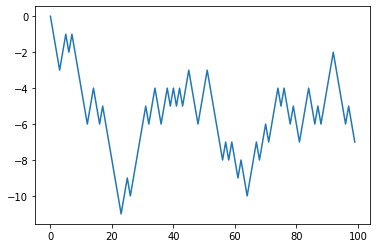

In [27]:
plt.plot(walk[:100])

In [28]:
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws>0,1,-1)
walk = steps.cumsum()
print(walk.min())
print(walk.max())

-9
35
